In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\samri\Downloads\Dataset .csv")


In [8]:
# Drop irrelevant columns
columns_to_drop = [
    'Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
    'Longitude', 'Latitude', 'Currency', 'Switch to order menu'
]
df.drop(columns=columns_to_drop, inplace=True)

In [9]:
# Fill missing values
df.ffill(inplace=True)

# Drop rows with missing cuisines
df = df[df['Cuisines'].notna()]

In [10]:
# Simplify to primary cuisine (take first listed cuisine)
df['Primary Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())

# Encode the target cuisine label
le = LabelEncoder()
df['Cuisine_Label'] = le.fit_transform(df['Primary Cuisine'])

# Encode categorical features
categorical_cols = ['City', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text']
df = pd.get_dummies(df, columns=categorical_cols)


In [11]:
# Define features and target
X = df.drop(columns=['Cuisines', 'Primary Cuisine', 'Cuisine_Label'])
y = df['Cuisine_Label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
from sklearn.metrics import classification_report

# Get unique labels present in y_test
labels_in_test = sorted(set(y_test))

# Map those back to cuisine names
target_names_in_test = le.inverse_transform(labels_in_test)

# Generate report only for present classes
print(classification_report(y_test, y_pred, labels=labels_in_test, target_names=target_names_in_test))



                 precision    recall  f1-score   support

       American       0.19      0.28      0.22        46
         Andhra       0.00      0.00      0.00         1
          Asian       0.06      0.08      0.07        13
            BBQ       0.00      0.00      0.00         3
         Bakery       0.18      0.18      0.18       112
       Bar Food       0.00      0.00      0.00         6
        Bengali       0.00      0.00      0.00         3
      Beverages       0.11      0.11      0.11        19
         Bihari       0.00      0.00      0.00         1
        Biryani       0.00      0.00      0.00        18
      Brazilian       0.50      0.67      0.57         3
      Breakfast       0.00      0.00      0.00         8
        British       0.00      0.00      0.00         4
         Burger       0.00      0.00      0.00        20
        Burmese       0.00      0.00      0.00         3
           Cafe       0.18      0.17      0.18       126
        Chinese       0.15    

C:\Users\samri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

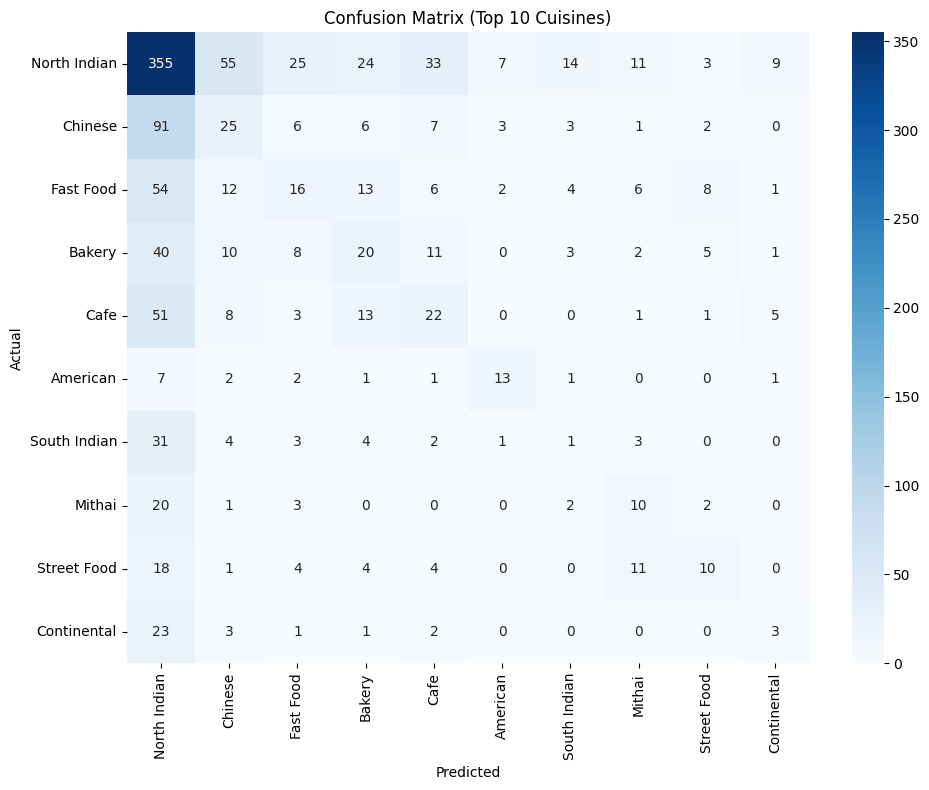

In [18]:
# Find top 10 cuisines by frequency
top_cuisines = df['Primary Cuisine'].value_counts().nlargest(10).index
top_labels = le.transform(top_cuisines)

# Filter test predictions to only those top cuisines
mask = y_test.isin(top_labels)
filtered_y_test = y_test[mask]
filtered_y_pred = y_pred[mask]

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(filtered_y_test, filtered_y_pred, labels=top_labels)
cuisine_names = le.inverse_transform(top_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, xticklabels=cuisine_names, yticklabels=cuisine_names, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Top 10 Cuisines)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
